## Models built on Kaggle EEG Brainwave dataset
https://www.kaggle.com/birdy654/eeg-brainwave-dataset-feeling-emotions

In [2]:
# Import required Libraries
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os

In [3]:
# Load dataset
brainwave_df = pd.read_csv('eeg-brainwave-dataset-feeling-emotions//emotions.csv')

In [7]:
brainwave_data_columns = brainwave_df.columns.values.tolist()

In [8]:
#checks the names of categories
print(brainwave_df["label"].value_counts())

#rules for replace
cleanup_rules = ({'NEUTRAL': 0, 'POSITIVE': 1, 'NEGATIVE': 2} )
#new dataset with replaced values
brainwave_encoded = brainwave_df.replace(cleanup_rules, inplace=False)

##print(eeg_data_encoded.head())
print(brainwave_encoded['label'].value_counts())

NEUTRAL     716
NEGATIVE    708
POSITIVE    708
Name: label, dtype: int64
0    716
1    708
2    708
Name: label, dtype: int64


In [9]:
y = brainwave_encoded.label

##eeg_data_features = ['mean_1_a', 'mean_2_a', 'mean_3_a', 'mean_4_a','mean_d_0_a', 'mean_d_1_a', 'mean_d_2_a', 'mean_d_3_a', 'mean_d_4_a']
brainwave_data_features = brainwave_data_columns[1:10]
X=brainwave_encoded[brainwave_data_features]

print("Predictions:")
print(y.head())
print("Features:")
print(X.head())

Predictions:
0    2
1    0
2    1
3    1
4    0
Name: label, dtype: int64
Features:
   mean_1_a  mean_2_a  mean_3_a  mean_4_a  mean_d_0_a  mean_d_1_a  mean_d_2_a  \
0      30.3    -356.0      15.6      26.3       1.070       0.411      -15.70   
1      33.1      32.0      25.8      22.8       6.550       1.680        2.88   
2      29.4    -416.0      16.7      23.7      79.900       3.360       90.20   
3      31.6    -143.0      19.8      24.3      -0.584      -0.284        8.82   
4      31.3      45.2      27.3      24.5      34.800      -5.790        3.06   

   mean_d_3_a  mean_d_4_a  
0        2.06        3.15  
1        3.83       -4.82  
2       89.90        2.03  
3        2.30       -1.97  
4       41.40        5.52  


In [10]:
label_df = brainwave_df['label']
brainwave_df.drop('label', axis = 1, inplace=True)

In [37]:
brainwave_df[['mean_1_a','mean_2_a','mean_3_a','mean_4_a','mean_d_0_a','mean_d_1_a','mean_d_2_a','mean_d_3_a','mean_d_4_a']]

,mean_1_a,mean_2_a,mean_3_a,mean_4_a,mean_d_0_a,mean_d_1_a,mean_d_2_a,mean_d_3_a,mean_d_4_a
0,30.3,-356.0,15.60,26.3,1.070,0.411,-15.700,2.060,3.15
1,33.1,32.0,25.80,22.8,6.550,1.680,2.880,3.830,-4.82
2,29.4,-416.0,16.70,23.7,79.900,3.360,90.200,89.900,2.03
3,31.6,-143.0,19.80,24.3,-0.584,-0.284,8.820,2.300,-1.97
4,31.3,45.2,27.30,24.5,34.800,-5.790,3.060,41.400,5.52
...,...,...,...,...,...,...,...,...,...
2127,32.2,32.2,30.80,23.4,1.640,-2.030,0.647,-0.121,-1.10
2128,31.3,-284.0,14.30,23.9,4.200,1.090,4.460,4.720,6.63
2129,28.3,-259.0,15.80,26.7,9.080,6.900,12.700,2.030,4.64
2130,19.9,-288.0,8.34,26.0,2.460,1.580,-16.000,1.690,4.74


Pearson’s correlation coefficient is the test statistics that measures the statistical relationship, or association, between two continuous variables.  It is known as the best method of measuring the association between variables of interest because it is based on the method of covariance.  It gives information about the magnitude of the association, or correlation, as well as the direction of the relationship.

In [38]:
correlations = brainwave_df[['mean_1_a','mean_2_a','mean_3_a','mean_4_a','mean_d_0_a','mean_d_1_a','mean_d_2_a','mean_d_3_a','mean_d_4_a']].corr(method='pearson')
correlations

,mean_1_a,mean_2_a,mean_3_a,mean_4_a,mean_d_0_a,mean_d_1_a,mean_d_2_a,mean_d_3_a,mean_d_4_a
mean_1_a,1.000000,-0.007202,0.571530,0.385041,-0.088608,-0.007586,-0.050463,-0.119391,-0.017197
mean_2_a,-0.007202,1.000000,0.081567,-0.095696,0.015122,0.014605,-0.004320,0.055625,-0.003564
mean_3_a,0.571530,0.081567,1.000000,0.220842,-0.117748,0.124462,-0.175592,-0.001782,0.017110
mean_4_a,0.385041,-0.095696,0.220842,1.000000,-0.017196,-0.007570,0.025546,-0.033443,-0.020361
mean_d_0_a,-0.088608,0.015122,-0.117748,-0.017196,1.000000,-0.520816,0.289196,0.424223,0.263961
mean_d_1_a,-0.007586,0.014605,0.124462,-0.007570,-0.520816,1.000000,-0.299949,0.274802,-0.087698
mean_d_2_a,-0.050463,-0.004320,-0.175592,0.025546,0.289196,-0.299949,1.000000,0.060814,0.011967
mean_d_3_a,-0.119391,0.055625,-0.001782,-0.033443,0.424223,0.274802,0.060814,1.000000,0.110584
mean_d_4_a,-0.017197,-0.003564,0.017110,-0.020361,0.263961,-0.087698,0.011967,0.110584,1.000000


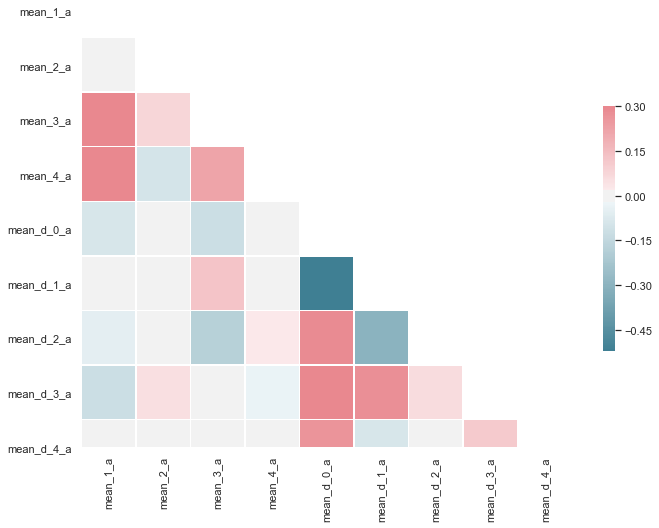

In [39]:
from string import ascii_letters
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

sns.set(style="white")

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(correlations, dtype=np.bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(correlations, mask=mask, cmap=cmap, vmax=.3, center=0,square=True, linewidths=.5, cbar_kws={"shrink": .5})

plt.show()

If skewness is positive, the data are positively skewed or skewed right, meaning that the right tail of the distribution is longer than the left. If skewness is negative, the data are negatively skewed or skewed left, meaning that the left tail is longer.

If skewness = 0, the data are perfectly symmetrical. 

If skewness is less than −1 or greater than +1, the distribution is highly skewed.
If skewness is between −1 and −½ or between +½ and +1, the distribution is moderately skewed.
If skewness is between −½ and +½, the distribution is approximately symmetric.

In [41]:
skew = brainwave_df[['mean_1_a','mean_2_a','mean_3_a','mean_4_a','mean_d_0_a','mean_d_1_a','mean_d_2_a','mean_d_3_a','mean_d_4_a']].skew()
skew

mean_1_a     -5.400903
mean_2_a     -1.769376
mean_3_a      0.293842
mean_4_a     -3.911369
mean_d_0_a    5.037609
mean_d_1_a    0.259055
mean_d_2_a   -2.678249
mean_d_3_a    4.729592
mean_d_4_a   -5.799641
dtype: float64

In [ ]:
# Some of the data seems highly skewed. 

## Import required libraries to run the models

In [44]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier

#import xgboost as xgb
#ModuleNotFoundError: No module named 'xgboost'
import warnings
warnings.filterwarnings('ignore')

In [45]:
%%time

pl_svm = Pipeline(steps=[('scaler',StandardScaler()),
                             ('pl_svm', LinearSVC())])
scores = cross_val_score(pl_svm, brainwave_df, label_df, cv=10,scoring='accuracy')
print('Accuracy for Linear SVM : ', scores.mean())

Accuracy for Linear SVM :  0.9643467083227542
Wall time: 2min 3s
